<a href="https://colab.research.google.com/github/iwwwama/homework1/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [3]:
pip install icrawler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from icrawler.builtin import BingImageCrawler

In [5]:
crawler = BingImageCrawler(storage={"root_dir":"sunflower"})
filters = dict(color='color')

In [7]:
crawler.crawl(keyword="sunflower", filters=filters, max_num=300)

In [8]:
crawler = BingImageCrawler(storage={"root_dir":"dandelion"})
filters = dict(color='color')

In [10]:
crawler.crawl(keyword="dandelion", filters=filters, max_num=300)

In [11]:
from os import listdir
import matplotlib.pyplot as plt
import cv2
path = "/content/drive/MyDrive/Colab Notebooks/sunflower"
imagesList = listdir(path)
print(imagesList)
fig=plt.figure(figsize=(20,20))
columns = 5
rows = 4

['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000071.jpg', '0000

<Figure size 2000x2000 with 0 Axes>

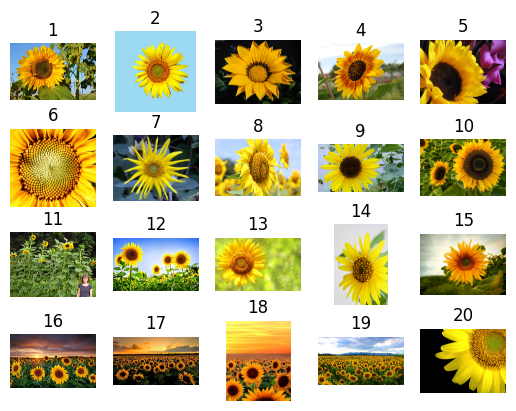

In [12]:
i=1
for file in imagesList:
    img_bgr= cv2.imread(path+"/"+file)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, columns, i)
    plt.title(i)
    plt.imshow(img_rgb)
    plt.axis('off')
    if i<20:
      	i=i+1
    else:
      break
plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from os import listdir
import numpy as np

In [14]:
classes = ["sunflower", "dandelion"]
num_classes = len(classes)
num_testdata = 30
X_train = []
X_test  = []
y_train = []
y_test  = []

In [15]:
for index, label in enumerate(classes):
    path = "/content/drive/MyDrive/Colab Notebooks/" + label + "/"
    imagesList = listdir(path)
    for i, img in enumerate(imagesList):
        img = img.strip()
        img = path + img
        temp_img = load_img(img, grayscale=False, target_size=(256,256))
        temp_img_array = img_to_array(temp_img) / 255
        if i < num_testdata:
            X_test.append(temp_img_array)
            y_test.append(index)
        else:
            X_train.append(temp_img_array)
            y_train.append(index)

In [16]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(365, 256, 256, 3)
(60, 256, 256, 3)
(365,)
(60,)


In [17]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(365, 2)
(60, 2)


In [18]:
from tensorflow.keras import layers
from tensorflow. keras import models

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator()
gen = train_datagen.flow(X_train, batch_size=5, shuffle=False)

(5, 256, 256, 3)


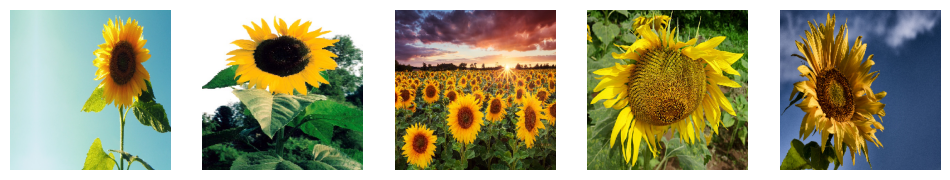

In [21]:
batches = gen.next()
print(batches.shape)
from tensorflow.keras.preprocessing.image import array_to_img
fig = plt.figure(figsize=(12, 5))
for i in range(len(batches)):
  gen_img = array_to_img(batches[i])
  plt.subplot(1, 5, i + 1)
  plt.imshow(gen_img)
  plt.axis('off')
plt.show()

In [22]:
train_datagen2 = ImageDataGenerator(width_shift_range=0.3)
gen2 = train_datagen2.flow(X_train, batch_size=5, shuffle=False)
batches = gen2.next()

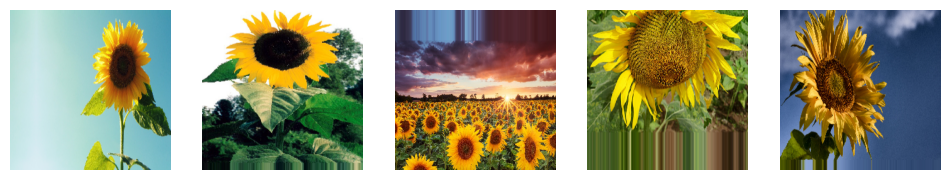

In [23]:
fig = plt.figure(figsize=(12, 5))
for i in range(len(batches)):
  gen_img = array_to_img(batches[i])
  plt.subplot(1, 5, i + 1)
  plt.imshow(gen_img)
  plt.axis('off')
plt.show()

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
val_datagen = ImageDataGenerator()

In [25]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=5)
val_generator = val_datagen.flow(X_test, y_test, batch_size=5, shuffle=False)

In [26]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [28]:
from keras import optimizers

In [29]:
model1.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['acc'])

In [30]:
history1 = model1.fit(train_generator, 
                      steps_per_epoch=X_train.shape[0]//5, epochs=100, 
                      validation_data=val_generator, 
                      validation_steps=X_test.shape[0]//5)

Epoch 1/100
73/73 [==============================] - 9s 75ms/step - loss: 0.5854 - acc: 0.6986 - val_loss: 0.3550 - val_acc: 0.8833
Epoch 2/100
73/73 [==============================] - 7s 98ms/step - loss: 0.5221 - acc: 0.7699 - val_loss: 0.3207 - val_acc: 0.8500
Epoch 3/100
73/73 [==============================] - 6s 82ms/step - loss: 0.4233 - acc: 0.8192 - val_loss: 0.4252 - val_acc: 0.8167
Epoch 4/100
73/73 [==============================] - 5s 73ms/step - loss: 0.4054 - acc: 0.8164 - val_loss: 0.3092 - val_acc: 0.8667
Epoch 5/100
73/73 [==============================] - 7s 95ms/step - loss: 0.4119 - acc: 0.8110 - val_loss: 0.3513 - val_acc: 0.9000
Epoch 6/100
73/73 [==============================] - 5s 74ms/step - loss: 0.3620 - acc: 0.8521 - val_loss: 0.2610 - val_acc: 0.8833
Epoch 7/100
73/73 [==============================] - 7s 92ms/step - loss: 0.3519 - acc: 0.8712 - val_loss: 0.2445 - val_acc: 0.9000
Epoch 8/100
73/73 [==============================] - 5s 72ms/step - loss: 0.

In [31]:
model1.save('model1.h5')

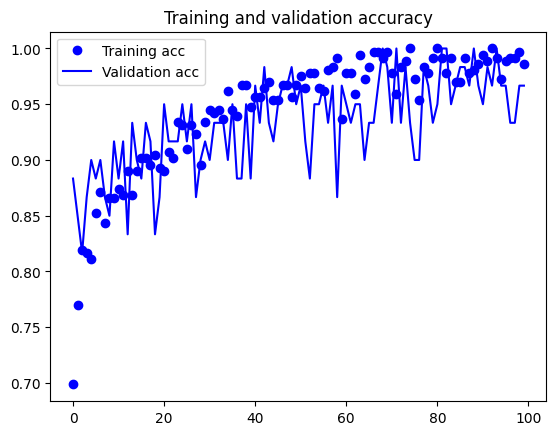

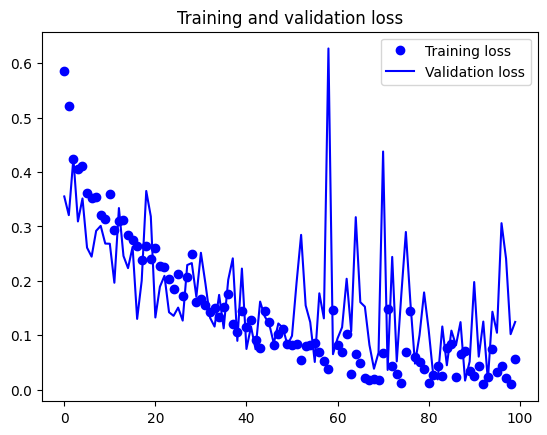

In [32]:
import matplotlib.pyplot as plt
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
test_loss, test_acc = model1.evaluate(val_generator, steps=X_test.shape[0]//5)
print('test acc', test_acc)

12/12 [==============================] - 0s 8ms/step - loss: 0.1246 - acc: 0.9667
test acc 0.9666666388511658
